In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi
import numpy as np

# Load the dataset
file_path = 'processed_dataset.csv'
df = pd.read_csv(file_path)

# Displaying the first few rows of the dataframe to understand its structure and contents
df.head()


,Start,Diver,Gender,Discipline,Line,Official Top,AP,RP,Card,Points,...,Title Event,Event Type,Day,Category Event,Date,Name,Country,Month,Experience Dive,Experience Discipline
0,136,(),2.0,3.0,NaN,00:00,0,37 m,WHITE,37.0,...,Compiled rankings for year 2000,Competition,2000-01-01,other,2000-01-01,(),None,1,1,1
1,140,(),2.0,3.0,NaN,00:00,0,40 m,WHITE,40.0,...,Compiled rankings for year 2001,Competition,2001-11-10,other,2001-11-10,(),None,11,2,2
2,10,(),2.0,3.0,NaN,00:00,0,31 m,WHITE,31.0,...,1st Portuguese Freediving Championship,Competition,2002-07-27,other,2002-07-27,(),None,7,3,3
3,162,(),2.0,3.0,NaN,00:00,0,33 m,WHITE,33.0,...,AIDA Pacific Cup 2002,Mixed Competition,2002-10-31,other,2002-10-31,(),None,10,4,4
4,137,(),2.0,3.0,NaN,00:00,34,32 m,YELLOW,12.0,...,Sony Freediver Open Classic 2003,Mixed Competition,2003-05-29,other,2003-05-29,(),None,5,5,5


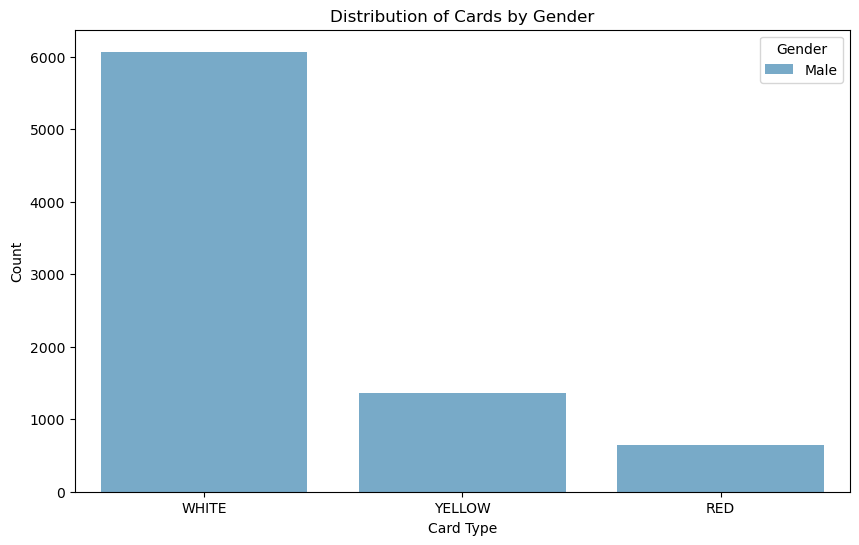

In [5]:
# Filtering the DataFrame to exclude "-" category in 'Card'
df_filtered = df[df['Card'] != '-']

# Plotting the distribution of cards by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Card', hue='Gender', data=df_filtered, palette='Blues')
plt.title('Distribution of Cards by Gender')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()


C:\Users\leoga\AppData\Local\Temp\ipykernel_6140\2474108055.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Discipline'] = df_filtered['Discipline'].map(discipline_mapping)


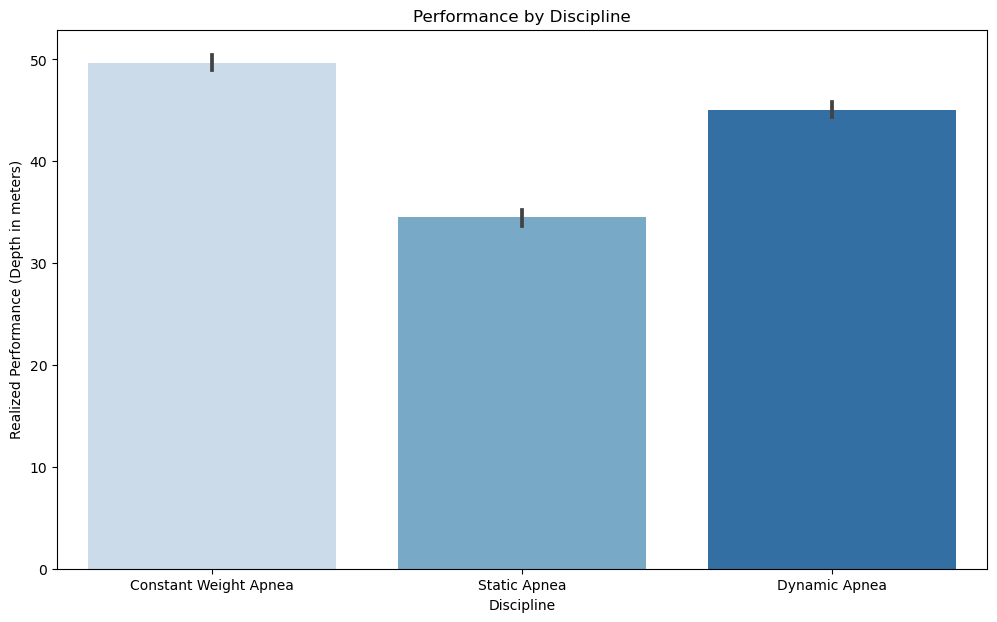

In [9]:
# Conversion de la colonne 'RP' en valeurs numériques pour permettre l'analyse
# Suppression des unités de mesure (ex: 'm') et conversion en nombre
df['RP_numeric'] = pd.to_numeric(df['RP'].str.replace(' m', ''), errors='coerce')

# Filtrage pour éliminer les valeurs manquantes ou non numériques
df_filtered = df.dropna(subset=['RP_numeric', 'Discipline'])

# Mapping numerical values to discipline names for readability
discipline_mapping = {
    1.0: 'Static Apnea',
    2.0: 'Dynamic Apnea',
    3.0: 'Constant Weight Apnea',
    4.0: 'Free Immersion Apnea',
    5.0: 'Variable Weight Apnea',
    6.0: 'No Limits Apnea'
}
df_filtered['Discipline'] = df_filtered['Discipline'].map(discipline_mapping)

# Plotting performances by discipline with horizontal x-axis labels for readability
plt.figure(figsize=(12, 7))
sns.barplot(x='Discipline', y='RP_numeric', data=df_filtered, palette='Blues')
plt.title('Performance by Discipline')
plt.xlabel('Discipline')
plt.ylabel('Realized Performance (Depth in meters)')
plt.xticks(rotation=0)  # Setting rotation to 0 for horizontal labels
plt.show()



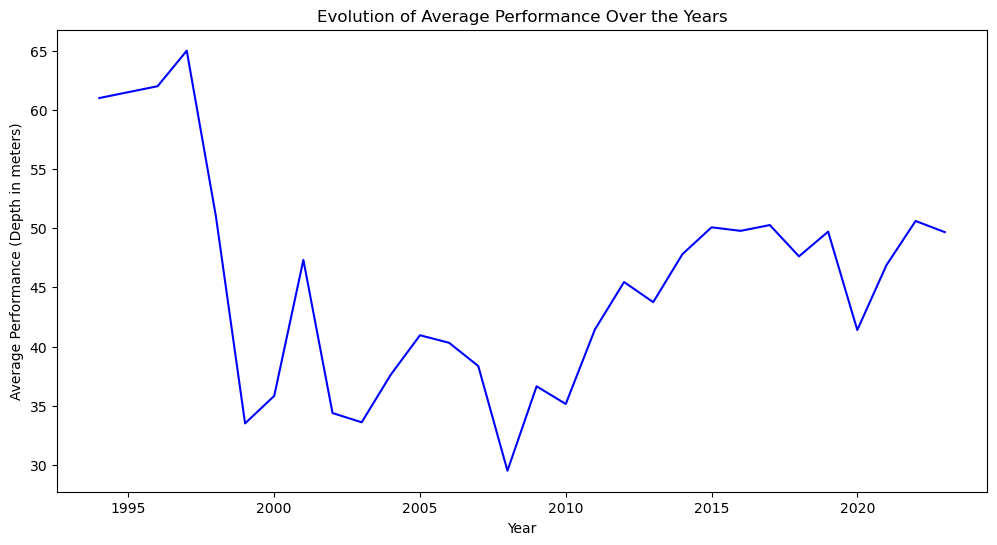

In [7]:
# Conversion de la colonne 'Date' en format de date pour permettre l'analyse temporelle
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Calcul de la performance moyenne par année
performance_by_year = df.groupby('Year')['RP_numeric'].mean().reset_index()

# Plotting the evolution of performances over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='RP_numeric', data=performance_by_year, color='blue')
plt.title('Evolution of Average Performance Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Performance (Depth in meters)')
plt.show()


C:\Users\leoga\AppData\Local\Temp\ipykernel_6140\469695632.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country_filtered['Country_Full'] = df_country_filtered['Country'].map(country_full_names).fillna(df_country_filtered['Country'])


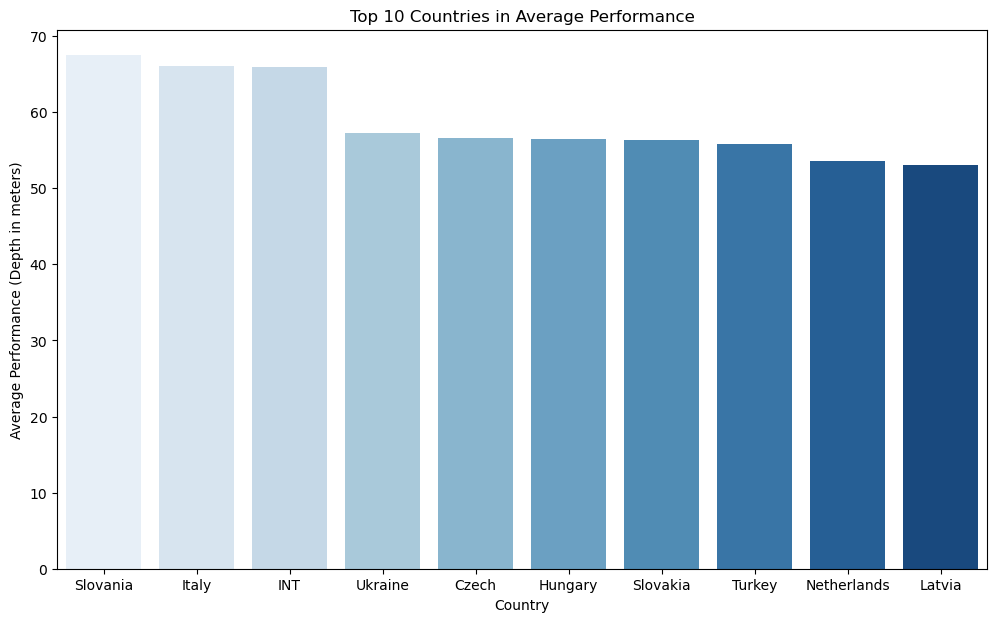

In [14]:
# Mapping country abbreviations to full names in English
country_full_names = {
    "UKR": "Ukraine",
    "SVK": "Slovakia",
    "HUN": "Hungary",
    "ITA": "Italy",
    "NLD": "Netherlands",
    "TUR": "Turkey",
    "SVN": "Slovania",
    "LVA": "Latvia",
    "JPN": "Japan",
    "CZE": "Czech"
}

# Updating the 'Country' column with full country names
df_country_filtered['Country_Full'] = df_country_filtered['Country'].map(country_full_names).fillna(df_country_filtered['Country'])

# Recalculating the average performance by country with updated country names
performance_by_country_full = df_country_filtered.groupby('Country_Full')['RP_numeric'].mean().sort_values(ascending=False).head(10)

# Plotting performances by country with horizontal country labels
plt.figure(figsize=(12, 7))
sns.barplot(x=performance_by_country_full.index, y=performance_by_country_full.values, palette='Blues')
plt.title('Top 10 Countries in Average Performance')
plt.xlabel('Country')
plt.ylabel('Average Performance (Depth in meters)')
plt.xticks(rotation=0)  # Setting rotation to 0 for horizontal labels
plt.show()


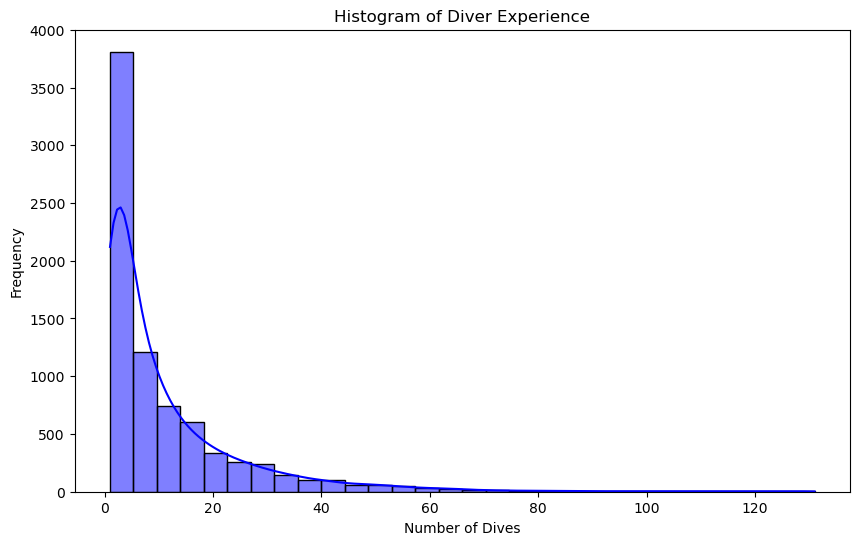

In [15]:
# Histogramme de la distribution de l'expérience des plongeurs
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['Experience Dive'], bins=30, color='blue', kde=True)
plt.title('Histogram of Diver Experience')
plt.xlabel('Number of Dives')
plt.ylabel('Frequency')
plt.show()

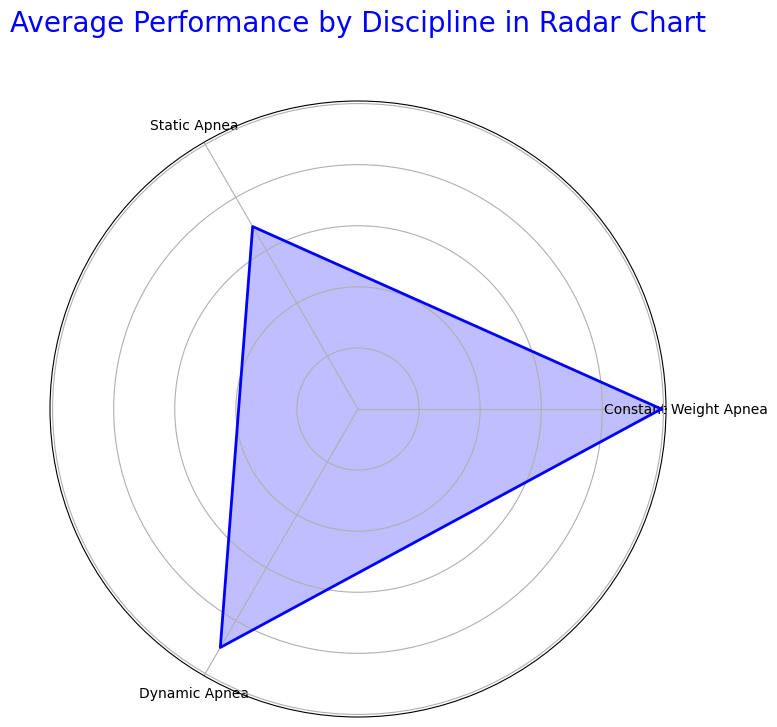

In [19]:
# Radar Chart des performances moyennes par discipline

# Préparation des données pour le radar chart
disciplines = df_filtered['Discipline'].unique()
labels=np.array(disciplines)
stats = df_filtered.groupby('Discipline')['RP_numeric'].mean().reindex(disciplines)

# Nombre de variables
num_vars = len(labels)

# Calcul de l'angle pour chaque axe du radar
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Le graphique est circulaire, donc il faut compléter la boucle
stats=np.concatenate((stats,[stats[0]]))
angles+=angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, stats, color='blue', alpha=0.25)
ax.plot(angles, stats, color='blue', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title('Average Performance by Discipline in Radar Chart', size=20, color='blue', y=1.1)
plt.show()


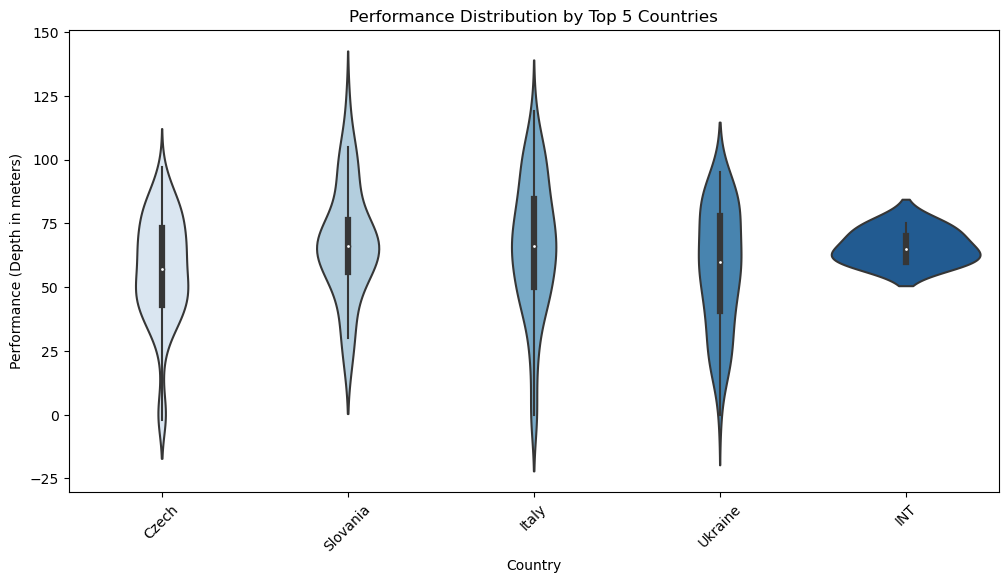

In [21]:
# 2. Violin Plot des performances par pays (Top 5)
top_countries = performance_by_country_full.head(5).index
df_top_countries = df_country_filtered[df_country_filtered['Country_Full'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.violinplot(x="Country_Full", y="RP_numeric", data=df_top_countries, palette="Blues")
plt.title('Performance Distribution by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Performance (Depth in meters)')
plt.xticks(rotation=45)
plt.show()

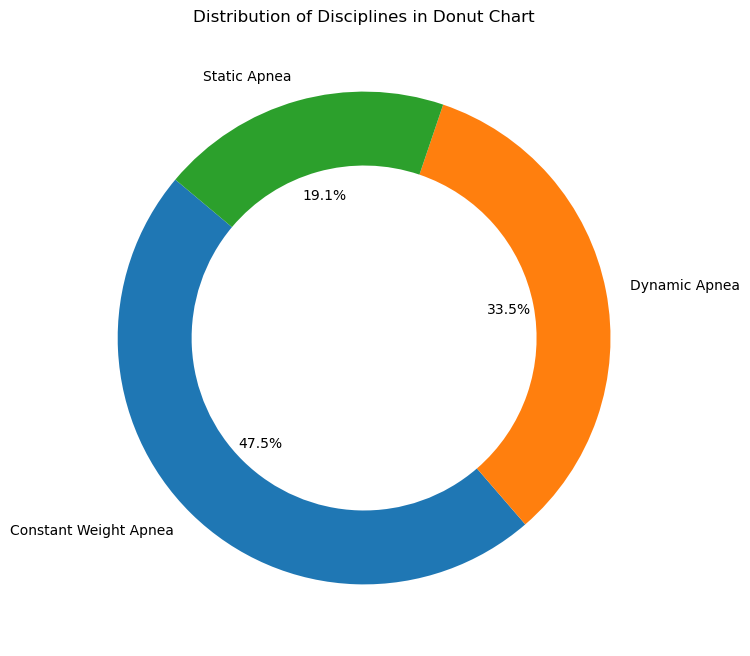

In [22]:
# Donut Chart de la répartition des disciplines
discipline_count = df_filtered['Discipline'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(discipline_count, labels=discipline_count.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Distribution of Disciplines in Donut Chart')
plt.show()